# TESTING SIGN CONVENTION WITH TILTS AND PSF DISPLACEMENT

In [1]:
import webbpsf
import matplotlib
from matplotlib import pyplot as plt

import poppy


%matplotlib inline

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-032 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-031
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


In [2]:
nrc = webbpsf.NIRCam()

ote = webbpsf.opds.OTE_Linear_Model_WSS()

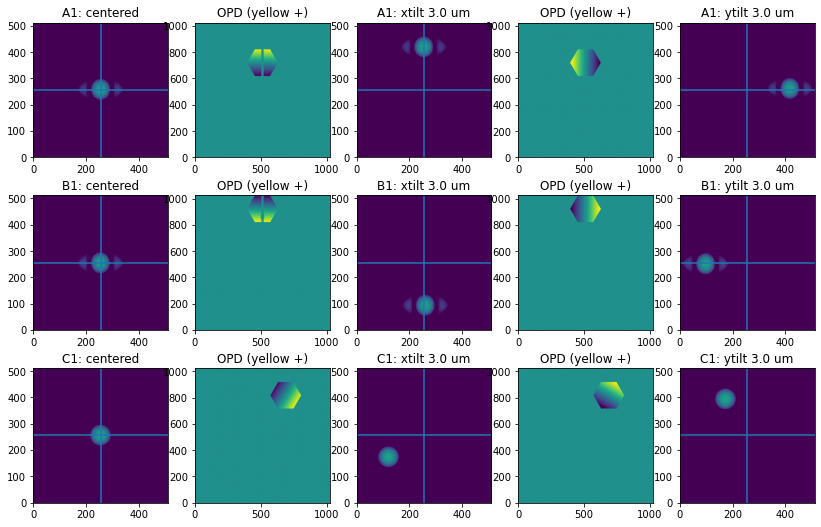

In [3]:
fig, axs = plt.subplots(3, 5, figsize=(14,9))#, sharex = True, sharey = True)

fov_pix = 256

tilt = 3.0

for i, iseg in enumerate(['A1', 'B1', 'C1']):
    ote.zero()
    
    pupil = webbpsf.webbpsf_core.one_segment_pupil(iseg)
    
    ote.amplitude = pupil[0].data
    nrc.pupil = ote

    # CENTERED PSF:
    psf = nrc.calc_psf(monochromatic=2e-6, fov_pixels=fov_pix/2)
    axs[i, 0].imshow(psf[0].data, norm=matplotlib.colors.LogNorm(vmax=1e-2, vmin=1e-5), origin="lower")
    axs[i, 0].set_title(iseg+": centered")
    axs[i, 0].axhline(y=fov_pix)
    axs[i, 0].axvline(x=fov_pix)

    
    ote.move_seg_local(iseg, xtilt=tilt)
        
    # PLOT RESULTING OPD:
    im = axs[i, 1].imshow(ote.opd, vmin=-4e-6, vmax=4e-6, origin="lower")
    axs[i, 1].set_title("OPD (yellow +)")


    # XTILT PSF:
    psf = nrc.calc_psf(monochromatic=2e-6, fov_pixels=fov_pix/2)
    axs[i, 2].imshow(psf[0].data, norm=matplotlib.colors.LogNorm(vmax=1e-2, vmin=1e-5), origin="lower")
    axs[i, 2].set_title(iseg+": xtilt {} um".format(tilt))
    axs[i, 2].axhline(y=fov_pix)
    axs[i, 2].axvline(x=fov_pix)
    

    ote.zero()
    ote.move_seg_local(iseg, ytilt=tilt)
    
    # PLOT RESULTING OPD:
    im = axs[i, 3].imshow(ote.opd, vmin=-4e-6, vmax=4e-6, origin="lower")
    axs[i, 3].set_title("OPD (yellow +)")


    # YTILT PSF:
    psf = nrc.calc_psf(monochromatic=2e-6, fov_pixels=fov_pix/2)
    axs[i, 4].imshow(psf[0].data, norm=matplotlib.colors.LogNorm(vmax=1e-2, vmin=1e-5), origin="lower")
    axs[i, 4].set_title(iseg+": ytilt {} um".format(tilt))
    axs[i, 4].axhline(y=fov_pix)
    axs[i, 4].axvline(x=fov_pix)


#    plt.savefig("TEST.png")